In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# DATA LOADING AND CLEANING

In [109]:
df = pd.read_csv("/content/drive/MyDrive/PROJECTS/household_energy_consumption_prediction/household_power_consumption.txt", sep=";", na_values="?", low_memory=False)

EXPLORE DATA

In [110]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [111]:
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


HANDLE DATETIMES

In [113]:
# create timestamp column
df["Timestamp"] = df["Date"]+ " " + df["Time"]
df["Timestamp"] = pd.to_datetime(df["Timestamp"], dayfirst=True)
timestampcol = df.pop("Timestamp")
df.insert(0, "Timestamp", timestampcol)

In [114]:
df

,Timestamp,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26 20:59:00,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26 21:00:00,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26 21:01:00,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


CONVERT TO NUMERIC VARIABLES

In [115]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')

CONVERT SUB METERINGS TO KWH

In [116]:
df['Sub_metering_1'] = df['Sub_metering_1'] / 1000
df['Sub_metering_2'] = df['Sub_metering_2'] / 1000
df['Sub_metering_3'] = df['Sub_metering_3'] / 1000

SET TIME INDEX

In [117]:
df.set_index("Timestamp", inplace=True)

DROP MISSING VALUES

In [118]:
df.dropna(inplace=True)

In [119]:
df.shape

(2049280, 9)

CUT FIRST DAY OUT

In [120]:
first_new_day_index = df[df.index.time == pd.to_datetime('00:00').time()].index[0]

In [121]:
df = df[df.index >= first_new_day_index]

CALCULATE ENERGY CONSUMPTION AND REMAINING ACTIVE ENERY (RAE)

In [122]:
df['Energy Consumption Kwh'] = df['Global_active_power'] / 60
df['RAE'] = df['Energy Consumption Kwh'] - df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum(axis=1)


<ipython-input-122-6be7eced9b45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Energy Consumption Kwh'] = df['Global_active_power'] / 60
<ipython-input-122-6be7eced9b45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RAE'] = df['Energy Consumption Kwh'] - df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum(axis=1)


In [123]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy Consumption Kwh,RAE
Timestamp,,,,,,,,,,,
2006-12-17 00:00:00,17/12/2006,00:00:00,1.044,0.152,242.73,4.4,0.0,0.002,0.0,0.017400,0.015400
2006-12-17 00:01:00,17/12/2006,00:01:00,1.520,0.220,242.20,7.4,0.0,0.001,0.0,0.025333,0.024333
2006-12-17 00:02:00,17/12/2006,00:02:00,3.038,0.194,240.14,12.6,0.0,0.002,0.0,0.050633,0.048633
2006-12-17 00:03:00,17/12/2006,00:03:00,2.974,0.194,239.97,12.4,0.0,0.001,0.0,0.049567,0.048567
2006-12-17 00:04:00,17/12/2006,00:04:00,2.846,0.198,240.39,11.8,0.0,0.002,0.0,0.047433,0.045433


EXPLORING WHAT HAPPENED FIRST DAY

In [124]:
first_day_df = df.iloc[:1440]
print(f"first day kwh consumption {first_day_df['Energy Consumption Kwh'].sum()} ")
print(f"first day average consumption {first_day_df['Energy Consumption Kwh'].mean()} ")


first day kwh consumption 56.507666666666665 
first day average consumption 0.039241435185185185 


In [125]:
first_day_df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy Consumption Kwh,RAE
Timestamp,,,,,,,,,,,
2006-12-17 00:00:00,17/12/2006,00:00:00,1.044,0.152,242.73,4.4,0.0,0.002,0.0,0.017400,0.015400
2006-12-17 00:01:00,17/12/2006,00:01:00,1.520,0.220,242.20,7.4,0.0,0.001,0.0,0.025333,0.024333
2006-12-17 00:02:00,17/12/2006,00:02:00,3.038,0.194,240.14,12.6,0.0,0.002,0.0,0.050633,0.048633
2006-12-17 00:03:00,17/12/2006,00:03:00,2.974,0.194,239.97,12.4,0.0,0.001,0.0,0.049567,0.048567
2006-12-17 00:04:00,17/12/2006,00:04:00,2.846,0.198,240.39,11.8,0.0,0.002,0.0,0.047433,0.045433


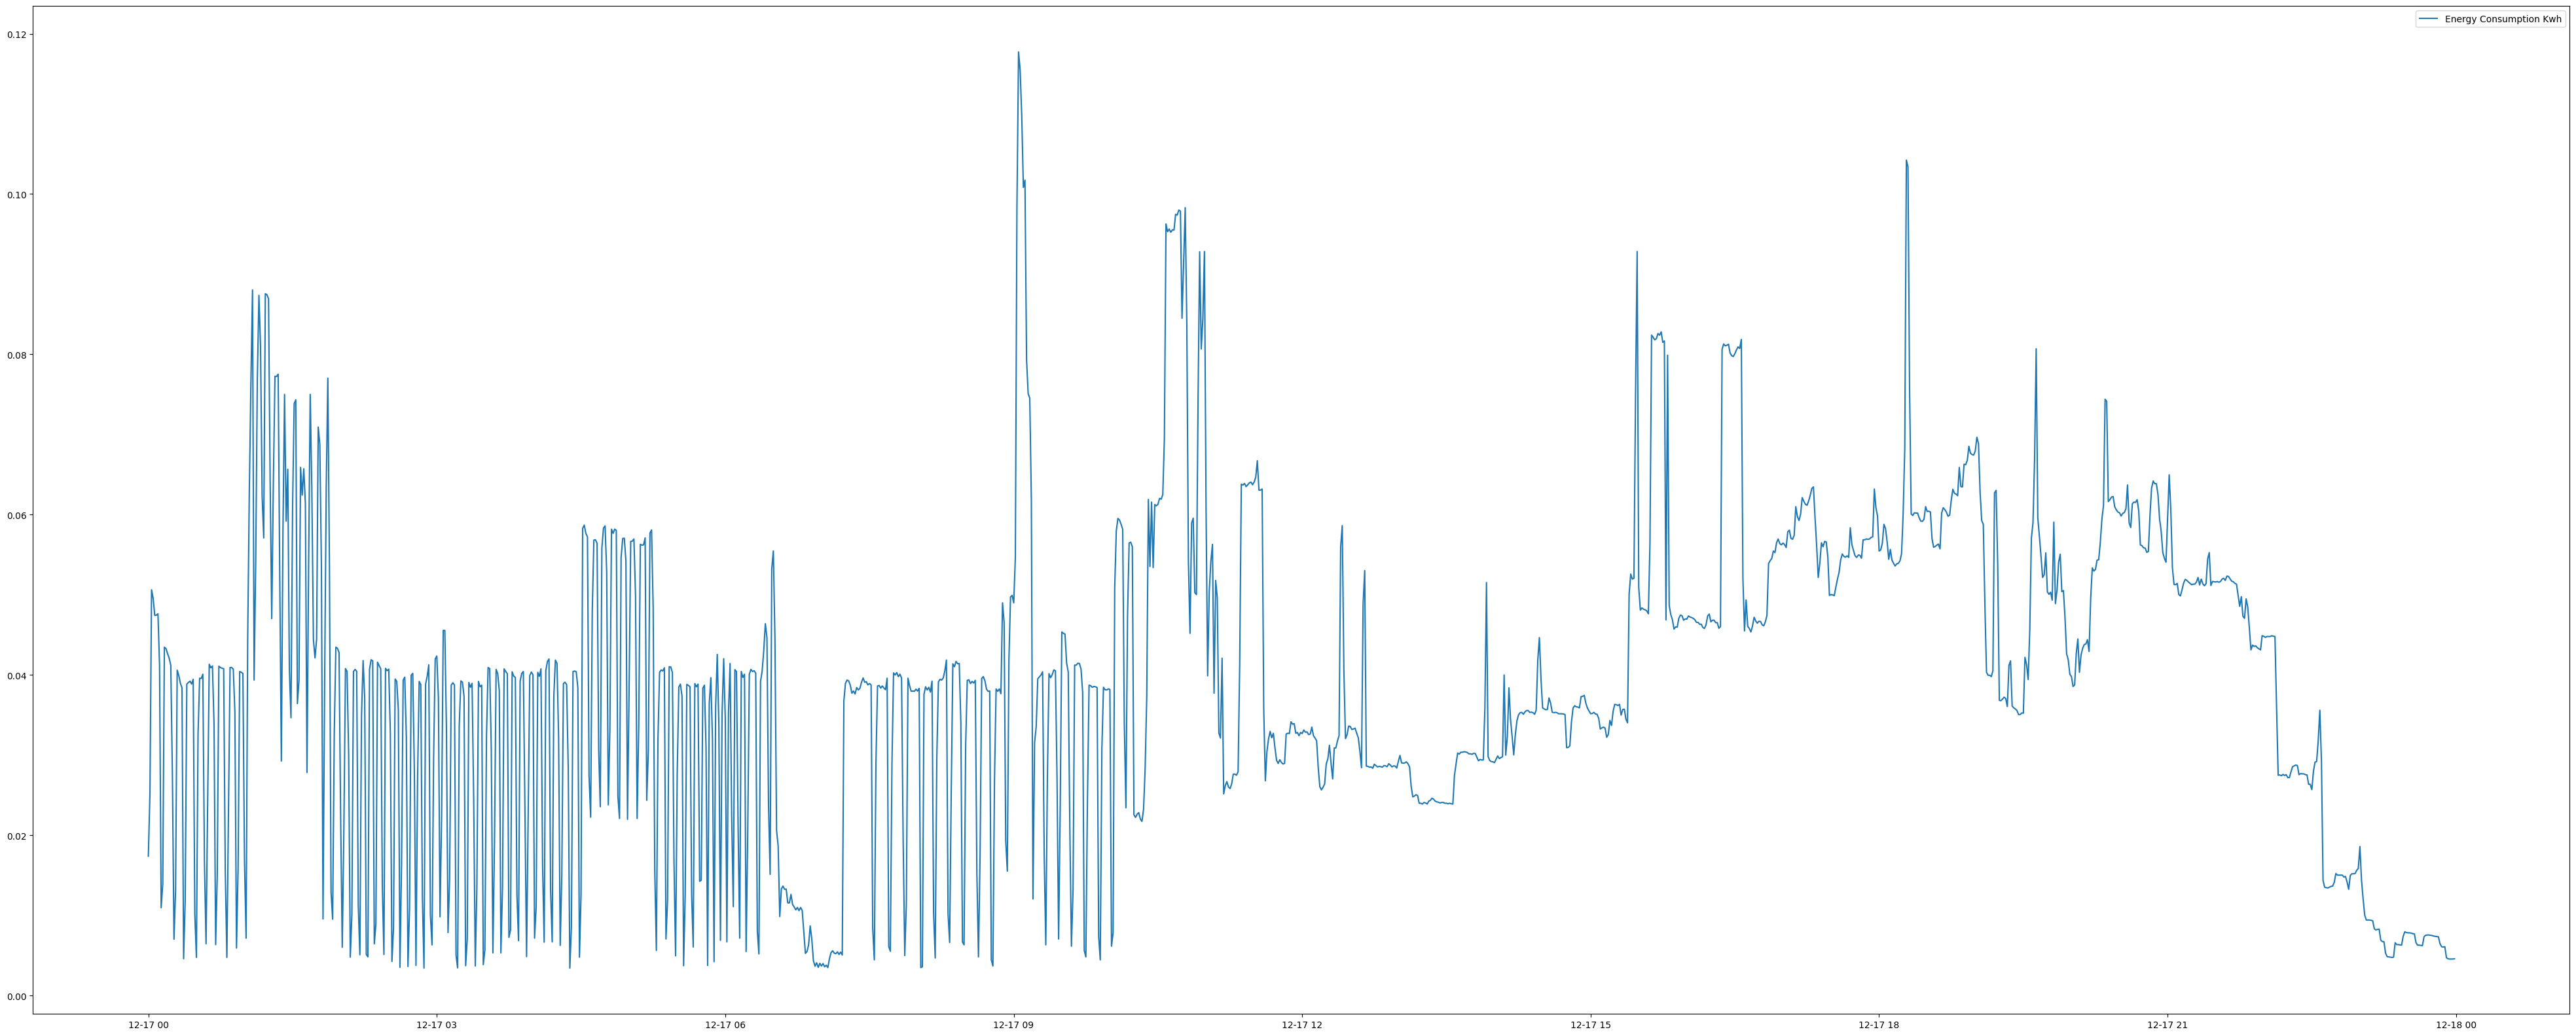

In [126]:
plt.figure(figsize=(50, 20) )

plt.plot(first_day_df['Energy Consumption Kwh'], label="Energy Consumption Kwh")
plt.legend()
plt.show()

CREATE HOURLY DATASET (RESAMPLE)

In [127]:
active_power_column = df['Global_active_power'].resample("h").mean()
energy_consumption_column = df['Energy Consumption Kwh'].resample("h").sum()
sub_metering_1_column = df['Sub_metering_1'].resample("h").sum()
sub_metering_2_column = df['Sub_metering_2'].resample("h").sum()
sub_metering_3_column = df['Sub_metering_3'].resample("h").sum()
rae_column = df['RAE'].resample("h").sum()


In [128]:
df_hourly = pd.concat([active_power_column, energy_consumption_column, sub_metering_1_column, sub_metering_2_column, sub_metering_3_column, rae_column], axis=1)

In [129]:
df_hourly.head()

,Global_active_power,Energy Consumption Kwh,Sub_metering_1,Sub_metering_2,Sub_metering_3,RAE
Timestamp,,,,,,
2006-12-17 00:00:00,1.882467,1.882467,0.0,0.028,0.000,1.854467
2006-12-17 01:00:00,3.349400,3.349400,0.0,1.514,0.000,1.835400
2006-12-17 02:00:00,1.587267,1.587267,0.0,0.034,0.000,1.553267
2006-12-17 03:00:00,1.662200,1.662200,0.0,0.046,0.000,1.616200
2006-12-17 04:00:00,2.215767,2.215767,0.0,0.034,0.533,1.648767


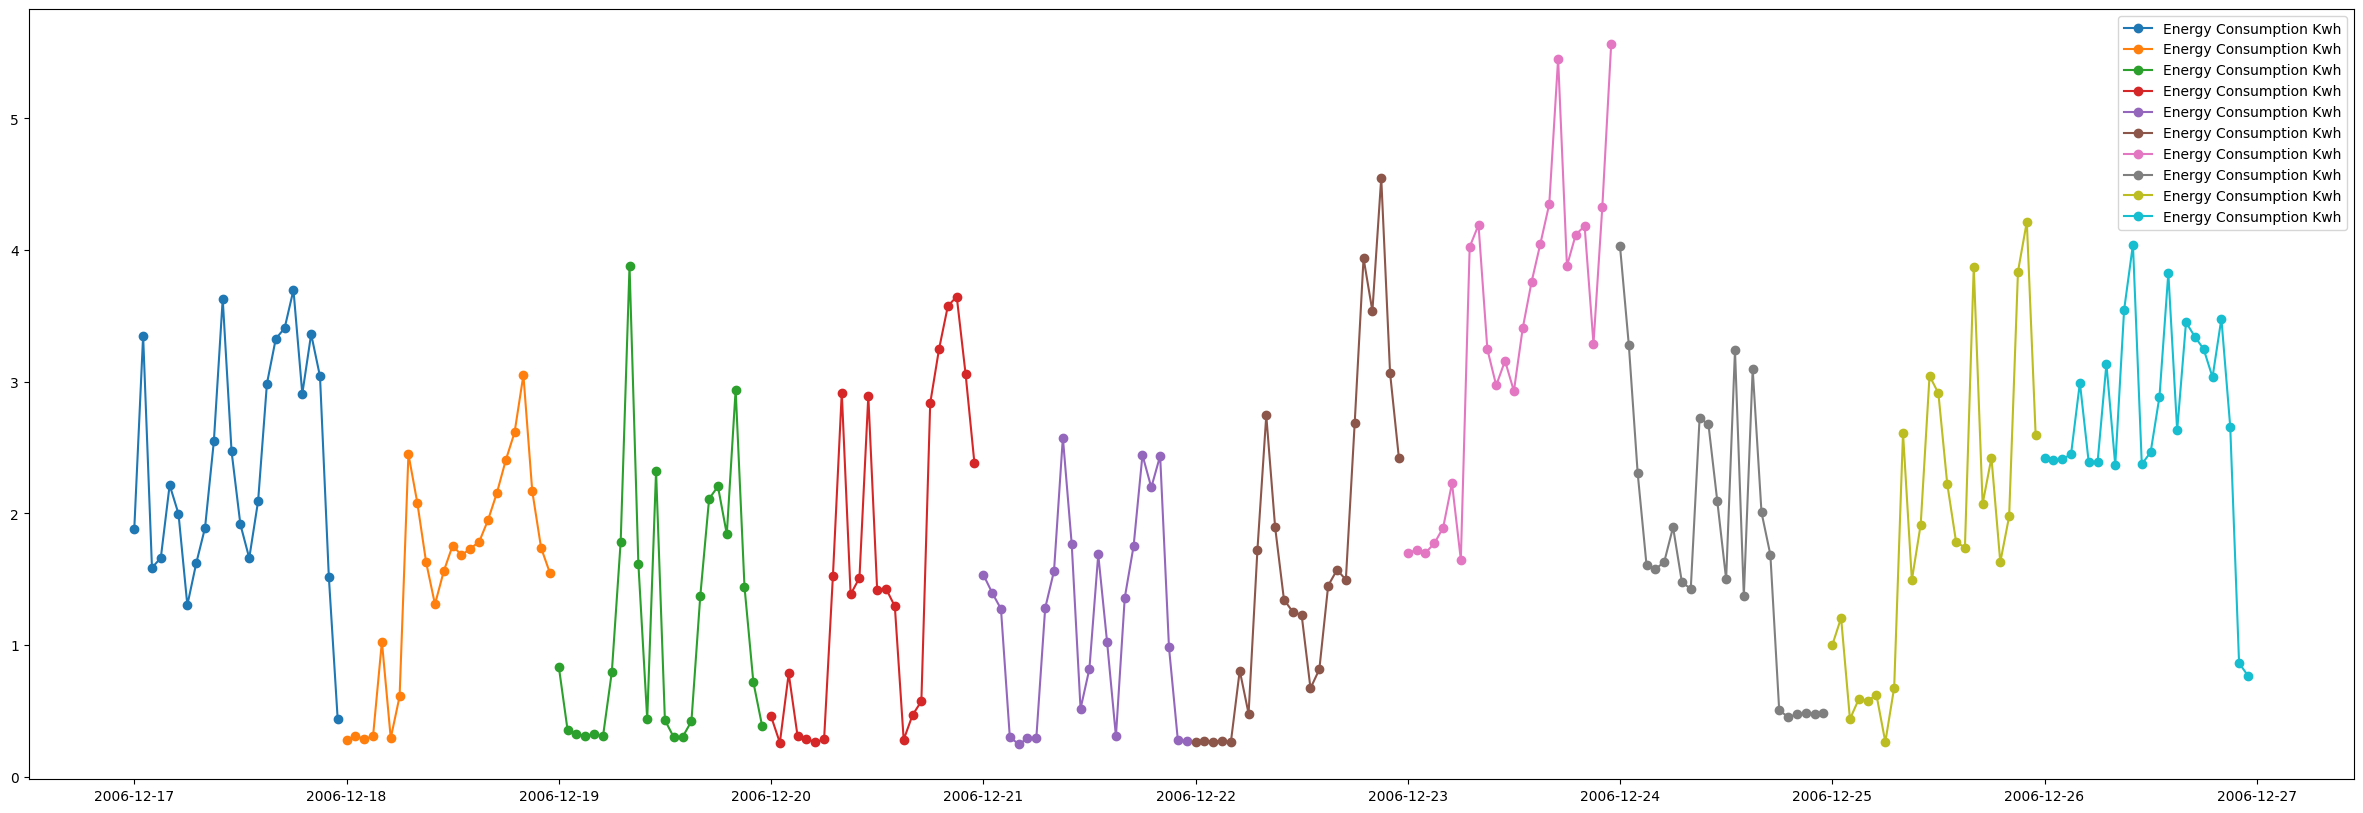

In [130]:
plt.figure(figsize=(30, 10) )

for i in range(0,240,24):
  plt.plot(df_hourly['Energy Consumption Kwh'][i:i+24], label="Energy Consumption Kwh", marker="o")
plt.legend()
plt.show()

CREATE DAILY DATASET

In [131]:
active_power_column_d = df['Global_active_power'].resample("d").mean()
energy_consumption_column_d = df['Energy Consumption Kwh'].resample("d").sum()
sub_metering_1_column = df['Sub_metering_1'].resample("d").sum()
sub_metering_2_column = df['Sub_metering_2'].resample("d").sum()
sub_metering_3_column = df['Sub_metering_3'].resample("d").sum()
rae_column = df['RAE'].resample("d").sum()

df_daily = pd.concat([active_power_column_d, energy_consumption_column_d, sub_metering_1_column, sub_metering_2_column, sub_metering_3_column, rae_column], axis=1)

In [132]:
df_daily.head()

,Global_active_power,Energy Consumption Kwh,Sub_metering_1,Sub_metering_2,Sub_metering_3,RAE
Timestamp,,,,,,
2006-12-17,2.354486,56.507667,2.033,4.187,13.341,36.946667
2006-12-18,1.530435,36.730433,1.063,2.621,14.018,19.028433
2006-12-19,1.157079,27.769900,0.839,7.602,6.197,13.131900
2006-12-20,1.545658,37.095800,0.000,2.648,14.063,20.384800
2006-12-21,1.193758,28.610400,1.765,2.623,10.421,13.801400


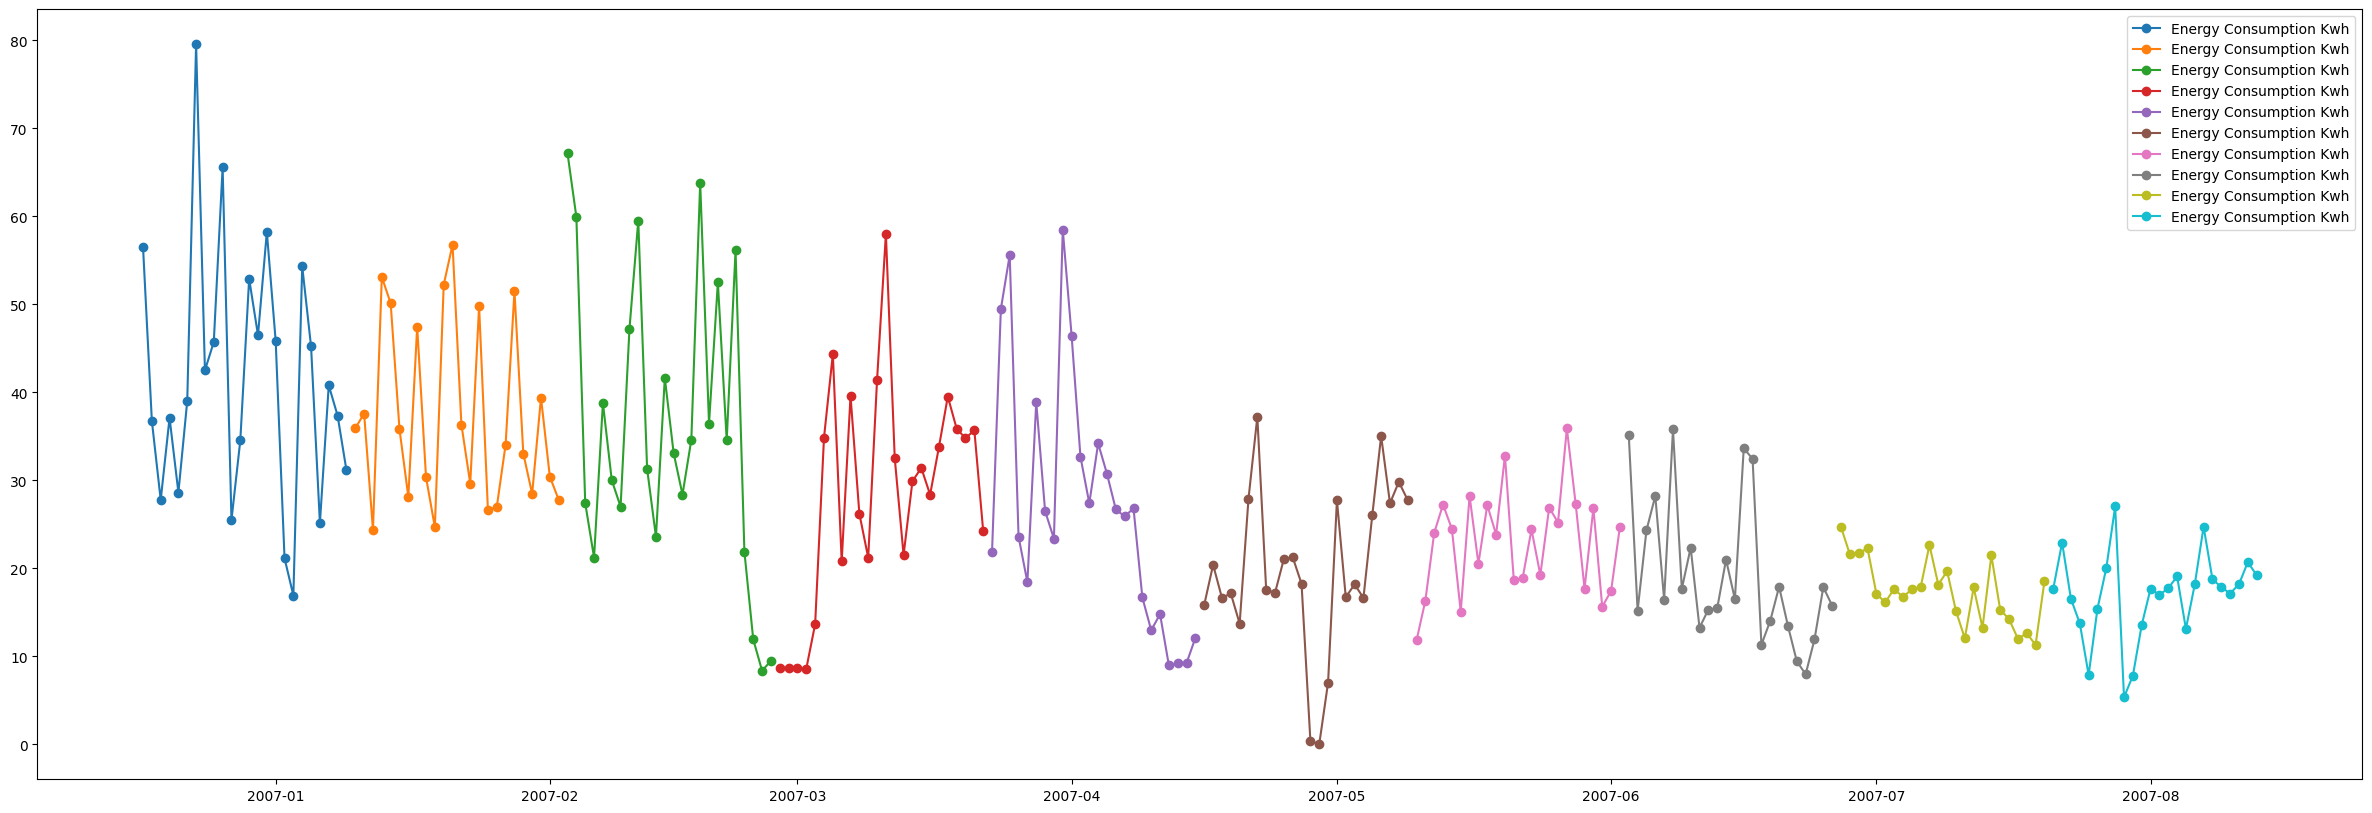

In [133]:
plt.figure(figsize=(30, 10) )

for i in range(0,240,24):
  plt.plot(df_daily['Energy Consumption Kwh'][i:i+24], label="Energy Consumption Kwh", marker="o")
plt.legend()
plt.show()

VISUALIZE HOURLY DATASET ( with help from AI)

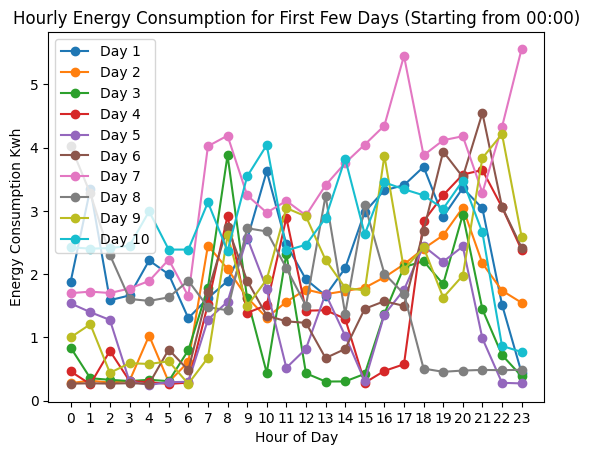

In [134]:
num_days_to_plot = 10 # Change this to the number of days you want

for i in range(num_days_to_plot):
  start_index = i * 24
  end_index = start_index + 24
  # Ensure you don't go out of bounds if the remaining data is less than a full day
  if end_index <= len(df_hourly):
      plt.plot(range(24), df_hourly['Energy Consumption Kwh'][start_index:end_index], label=f"Day {i+1}", marker="o")
  else:
      plt.plot(range(len(df_hourly) - start_index), df_hourly['Energy Consumption Kwh'][start_index:], label=f"Day {i+1}", marker="o")


plt.legend()
plt.title("Hourly Energy Consumption for First Few Days (Starting from 00:00)")
plt.xlabel("Hour of Day")
plt.ylabel("Energy Consumption Kwh")
plt.xticks(range(24)) # Set x-ticks to 0-23 for hours
plt.show()

EXPLORE DAYS OF WEEK

In [135]:
df_hourly["Day"] = df_hourly.index.day_name()
df_hourly["hour"] = df_hourly.index.hour
df_hourly["month"] = df_hourly.index.month
df_hourly["year"] = df_hourly.index.year
df_hourly["day_of_year"] = df_hourly.index.dayofyear
df_hourly["day_of_week"] = df_hourly.index.dayofweek
df_hourly["week_of_year"] = df_hourly.index.isocalendar().week


PLOT WEEKDAYS

<ipython-input-136-7e2ef573319b>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  day = df_hourly["Day"][start_index]


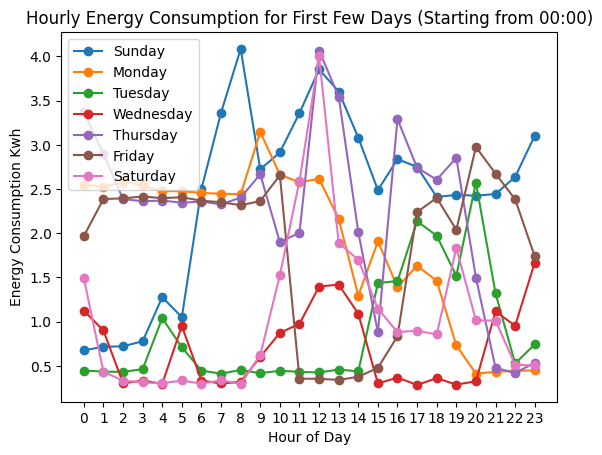

In [136]:
num_days_to_plot = 21

for i in range(14,num_days_to_plot):
  start_index = i * 24
  end_index = start_index + 24
  day = df_hourly["Day"][start_index]
  plt.plot(range(24), df_hourly['Energy Consumption Kwh'][start_index:end_index], label=day, marker="o")


plt.legend()
plt.title("Hourly Energy Consumption for First Few Days (Starting from 00:00)")
plt.xlabel("Hour of Day")
plt.ylabel("Energy Consumption Kwh")
plt.xticks(range(24))
plt.show()

CALCULATE AVERAGE PER HOUR PER WEEKDAY

In [137]:
hourly_analysis_arr = np.zeros((7,24))
days_of_week =["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
for i in range(hourly_analysis_arr.shape[0]):
  day_df = df_hourly[df_hourly["Day"] == days_of_week[i]]
  for j in range(hourly_analysis_arr.shape[1]):
    hourly_analysis_arr[i][j] = day_df[day_df["hour"] == j]["Energy Consumption Kwh"].mean()



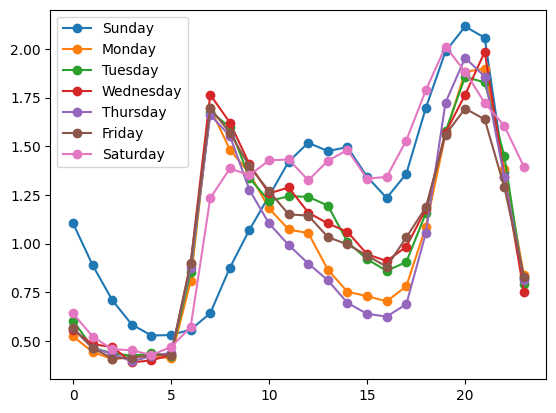

In [138]:
for i in range(hourly_analysis_arr.shape[0]):
  plt.plot(range(24), hourly_analysis_arr[i], label=days_of_week[i], marker="o")


plt.legend()

EXPLORE SUB METERINGS

In [139]:
df_hourly.head()

,Global_active_power,Energy Consumption Kwh,Sub_metering_1,Sub_metering_2,Sub_metering_3,RAE,Day,hour,month,year,day_of_year,day_of_week,week_of_year
Timestamp,,,,,,,,,,,,,
2006-12-17 00:00:00,1.882467,1.882467,0.0,0.028,0.000,1.854467,Sunday,0,12,2006,351,6,50
2006-12-17 01:00:00,3.349400,3.349400,0.0,1.514,0.000,1.835400,Sunday,1,12,2006,351,6,50
2006-12-17 02:00:00,1.587267,1.587267,0.0,0.034,0.000,1.553267,Sunday,2,12,2006,351,6,50
2006-12-17 03:00:00,1.662200,1.662200,0.0,0.046,0.000,1.616200,Sunday,3,12,2006,351,6,50
2006-12-17 04:00:00,2.215767,2.215767,0.0,0.034,0.533,1.648767,Sunday,4,12,2006,351,6,50


In [140]:
df_hourly_one_day = df_hourly.iloc[:24]
df_hourly_one_day.head()

,Global_active_power,Energy Consumption Kwh,Sub_metering_1,Sub_metering_2,Sub_metering_3,RAE,Day,hour,month,year,day_of_year,day_of_week,week_of_year
Timestamp,,,,,,,,,,,,,
2006-12-17 00:00:00,1.882467,1.882467,0.0,0.028,0.000,1.854467,Sunday,0,12,2006,351,6,50
2006-12-17 01:00:00,3.349400,3.349400,0.0,1.514,0.000,1.835400,Sunday,1,12,2006,351,6,50
2006-12-17 02:00:00,1.587267,1.587267,0.0,0.034,0.000,1.553267,Sunday,2,12,2006,351,6,50
2006-12-17 03:00:00,1.662200,1.662200,0.0,0.046,0.000,1.616200,Sunday,3,12,2006,351,6,50
2006-12-17 04:00:00,2.215767,2.215767,0.0,0.034,0.533,1.648767,Sunday,4,12,2006,351,6,50


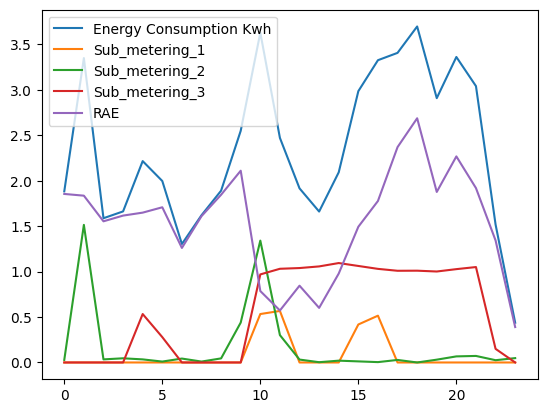

In [141]:
plt.plot(range(24),df_hourly_one_day['Energy Consumption Kwh'], label="Energy Consumption Kwh")
plt.plot(range(24),df_hourly_one_day['Sub_metering_1'], label="Sub_metering_1")
plt.plot(range(24),df_hourly_one_day['Sub_metering_2'], label="Sub_metering_2")
plt.plot(range(24),df_hourly_one_day['Sub_metering_3'], label="Sub_metering_3")
plt.plot(range(24),df_hourly_one_day['RAE'], label="RAE")

plt.legend()
plt.show()

BOXPLOTS FOR TOTAL ENERGY CONSUMPTION

per hour of day

In [158]:
hourly_data = []

for i in range(24):
    hour_data = df_hourly[df_hourly["hour"] == i]["Energy Consumption Kwh"].values
    hourly_data.append(hour_data)

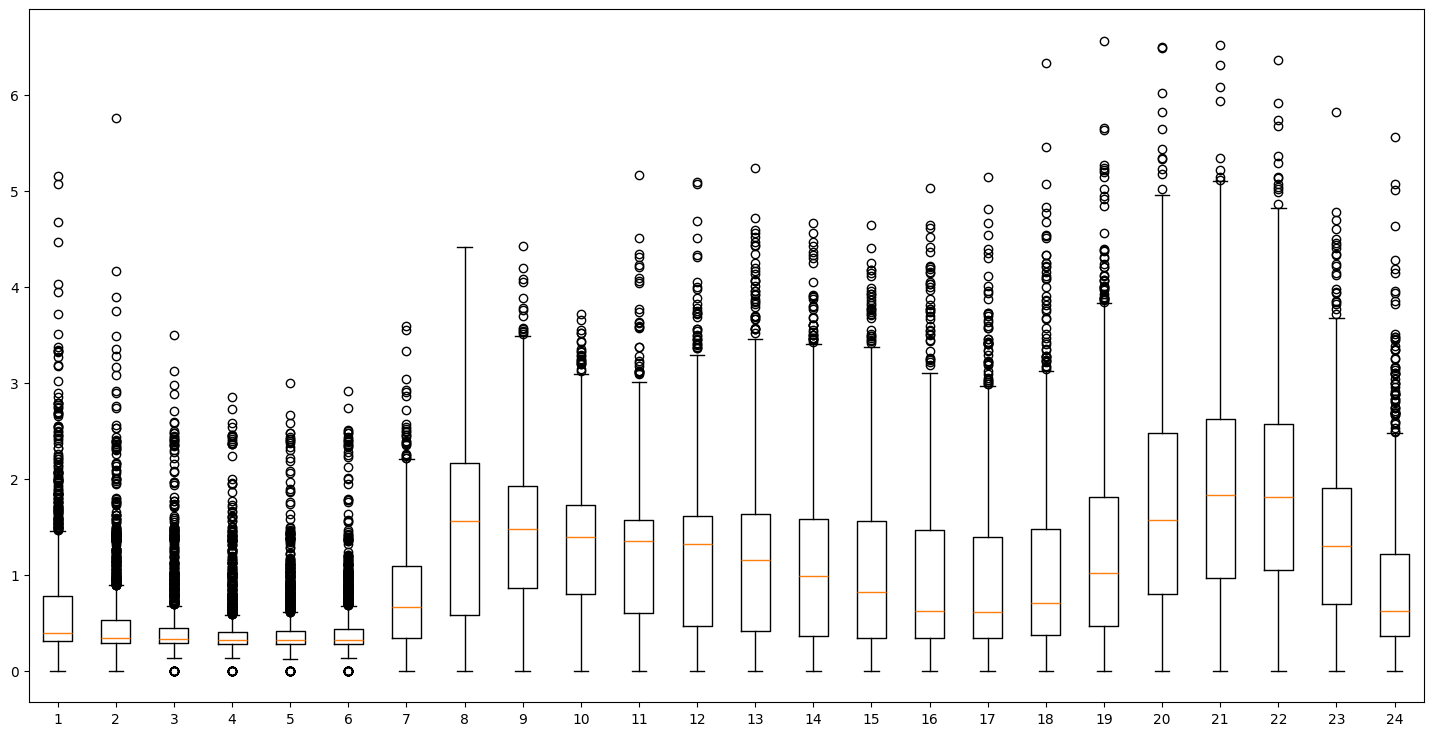

In [164]:
plt.subplots(figsize=(18,9))
plt.boxplot(hourly_data)
plt.show()

per day of week

In [167]:
days_of_week =["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
day_of_week_data = []
for i in days_of_week:
    day_data = df_hourly[df_hourly["Day"] == i]["Energy Consumption Kwh"].values
    day_of_week_data.append(day_data)

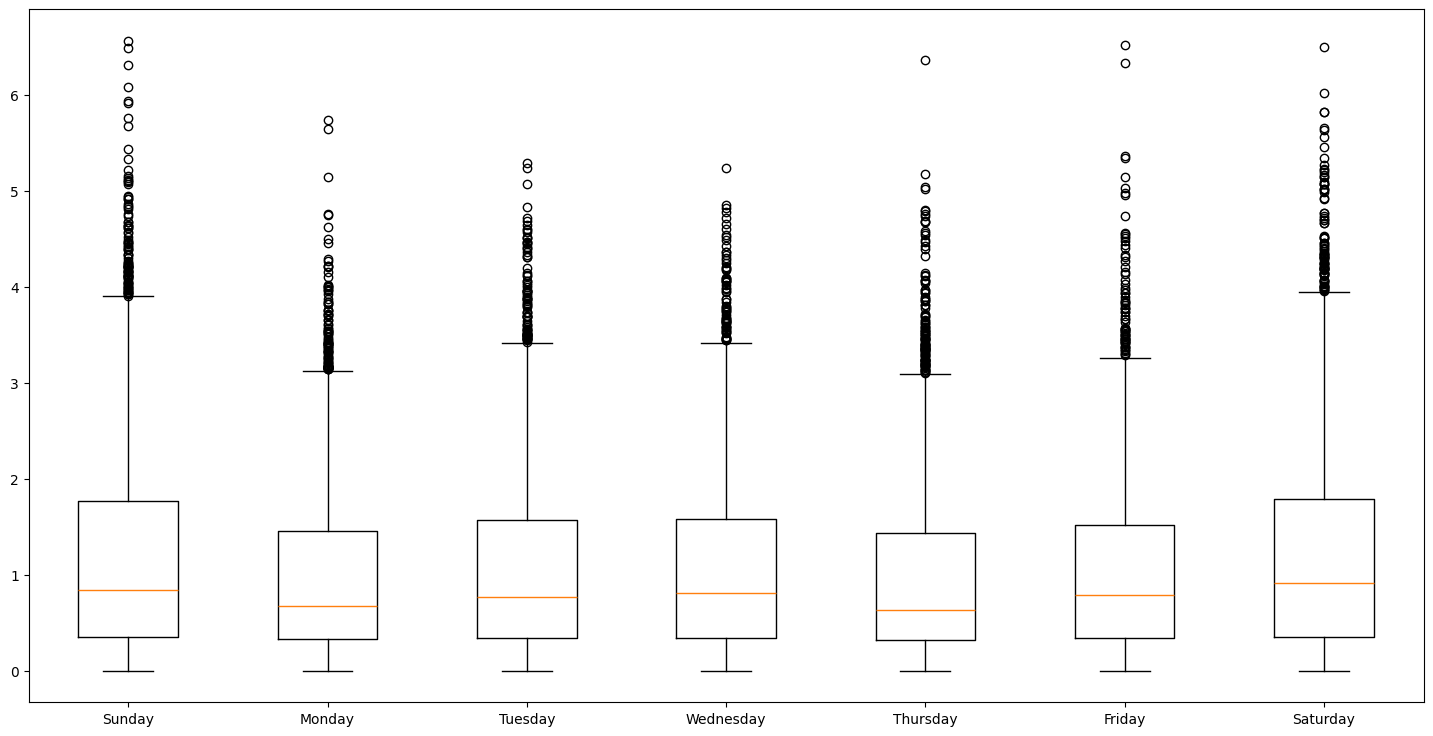

In [176]:
fig, ax = plt.subplots(figsize=(18,9))
# Get the current axes object

ax.boxplot(day_of_week_data)
# Use the set_xticklabels method of the axes object
ax.set_xticklabels(days_of_week)
plt.show()

per month

In [182]:
monthly_data = []

for i in range(1,13):
    month_data = df_hourly[df_hourly["month"] == i]["Energy Consumption Kwh"].values
    monthly_data.append(month_data)

{'whiskers': [<matplotlib.lines.Line2D at 0x7800bc2f0050>,
 'caps': [<matplotlib.lines.Line2D at 0x7800bc2bcd10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7800bc2f3cd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7800bc2bc2d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7800bc2be110>,
 'means': []}

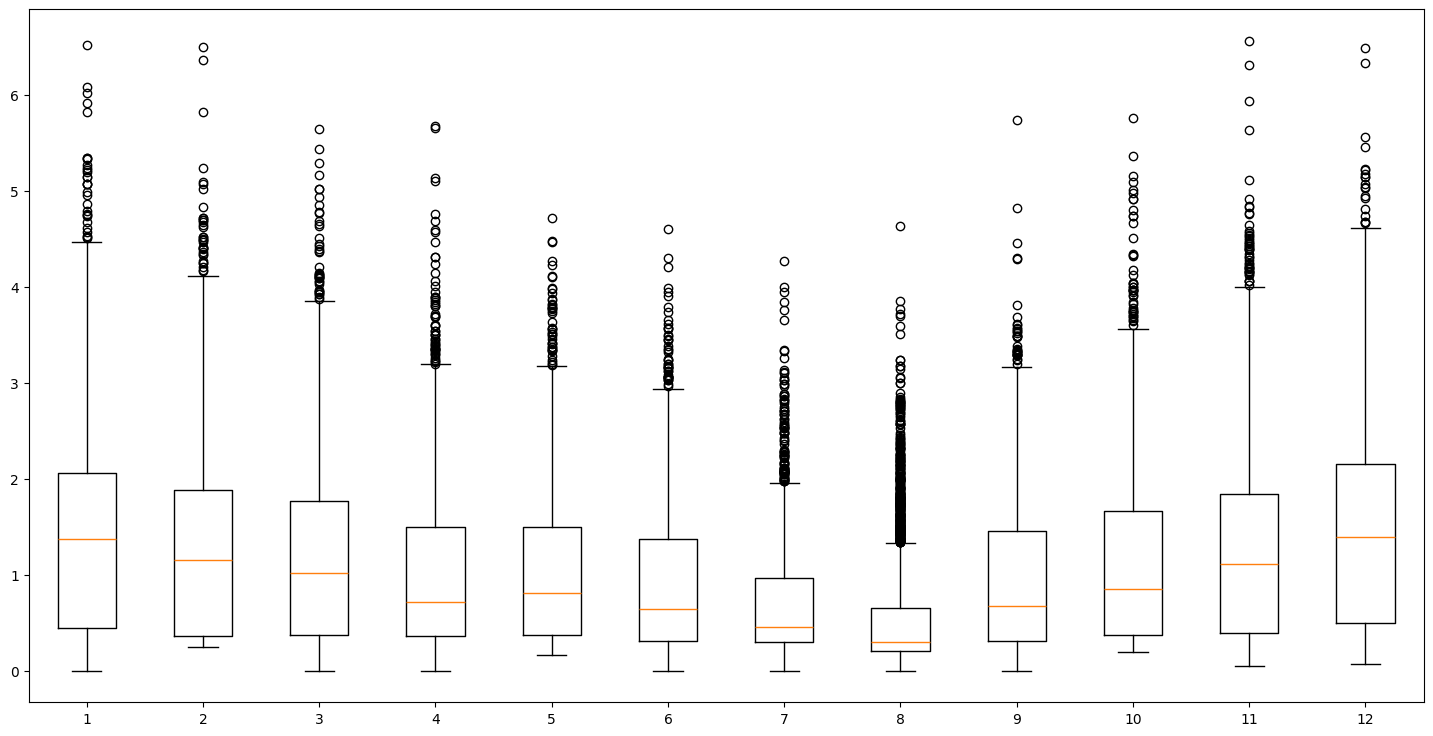

In [183]:
fig, ax = plt.subplots(figsize=(18,9))
# Get the current axes object

ax.boxplot(monthly_data)


GET CORRELATIONS

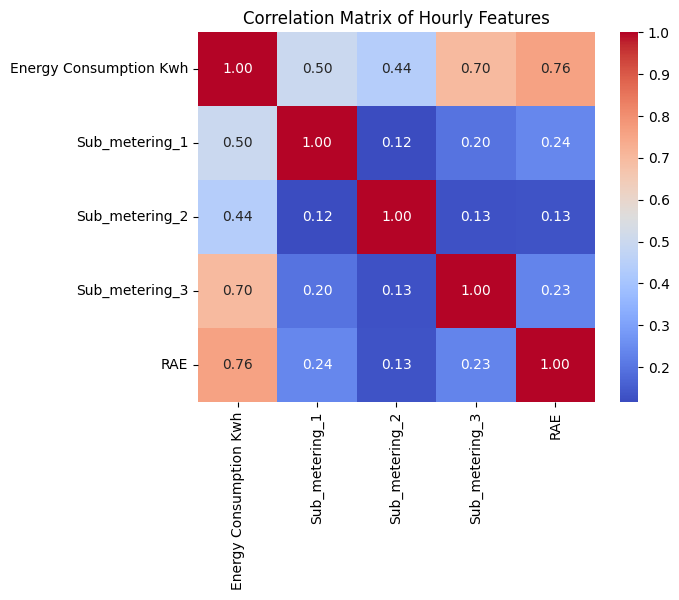

In [187]:
import seaborn as sns

num_cols = ["Energy Consumption Kwh", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "RAE"]
corr_matrix = df_hourly[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Hourly Features')
plt.show()